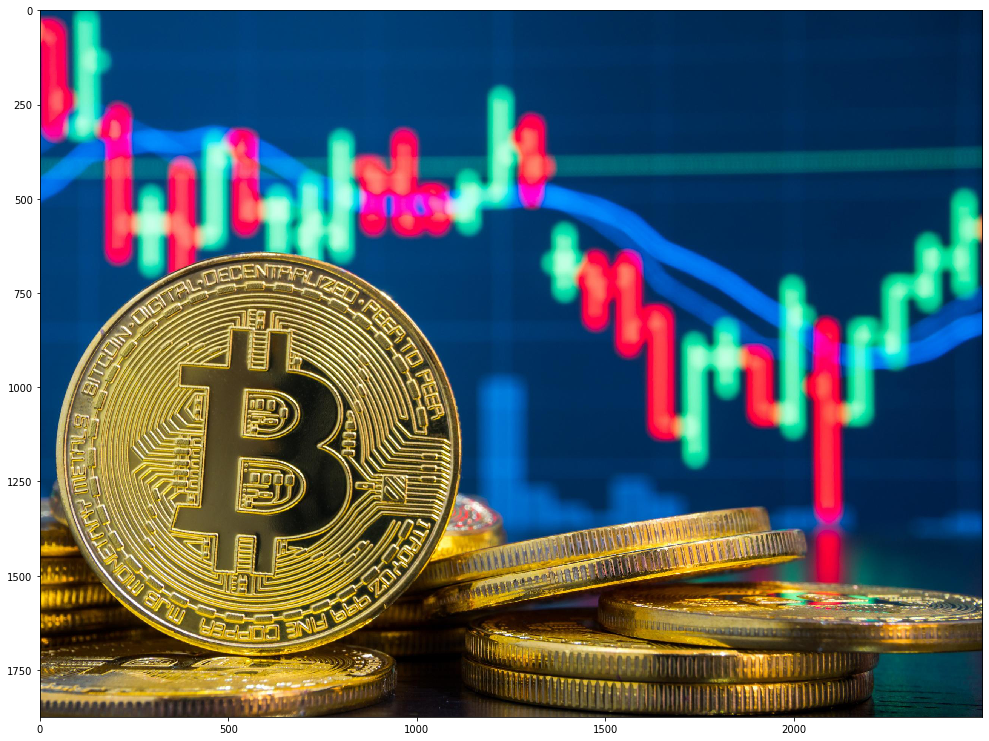

In [2]:
from matplotlib import image
import matplotlib.pyplot as plt
img=image.imread("C:/Users/DELL/Downloads/bitcoinpicture.jpg")
plt.figure(figsize=(17,13))
plt.imshow(img)

In [36]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [4]:
data_1=pd.read_csv("C:/Users/DELL/Downloads/coinbaseUSD.csv")
data_2=pd.read_csv("C:/Users/DELL/Downloads/bitstampUSD.csv")

In [6]:
print(data_1.info(null_counts=True))
print(data_2.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          2099760 non-null  int64  
 1   Open               1990691 non-null  float64
 2   High               1990691 non-null  float64
 3   Low                1990691 non-null  float64
 4   Close              1990691 non-null  float64
 5   Volume_(BTC)       1990691 non-null  float64
 6   Volume_(Currency)  1990691 non-null  float64
 7   Weighted_Price     1990691 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997697 entries, 0 to 3997696
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          3997697 non-null  int64  
 1   Open               2765819 non-null  float64
 2   High          

In [7]:
print(data_1.describe())
print(data_1.info())
print(len(data_1))
print(len(data_1.columns))
print('Data_1 - Rows are {rows} and Columns are {columns}'.format(rows=data_1.shape[0],columns=data_1.shape[1]))

          Timestamp          Open          High           Low         Close  \
count  2.099760e+06  1.990691e+06  1.990691e+06  1.990691e+06  1.990691e+06   
mean   1.483899e+09  3.246403e+03  3.247829e+03  3.244856e+03  3.246403e+03   
std    3.638214e+07  3.799154e+03  3.801394e+03  3.796761e+03  3.799150e+03   
min    1.417412e+09  6.000000e-02  6.000000e-02  6.000000e-02  6.000000e-02   
25%    1.452410e+09  4.195800e+02  4.196400e+02  4.195000e+02  4.195700e+02   
50%    1.483906e+09  1.014580e+03  1.014890e+03  1.014150e+03  1.014530e+03   
75%    1.515402e+09  6.322630e+03  6.324010e+03  6.321090e+03  6.322670e+03   
max    1.546899e+09  1.989199e+04  1.989199e+04  1.989198e+04  1.989199e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  1.990691e+06       1.990691e+06    1.990691e+06  
mean   7.849139e+00       3.600157e+04    3.246341e+03  
std    1.873222e+01       1.401879e+05    3.799078e+03  
min    1.000000e-08       2.641700e-06    6.000000e-02  
25%

In [8]:
print(data_2.describe())
print(data_2.info())
print(len(data_2))
print(len(data_2.columns))
print('Data_2 - Rows are {rows} and Columns are {columns}'.format(rows=data_2.shape[0],columns=data_2.shape[1]))

          Timestamp          Open          High           Low         Close  \
count  3.997697e+06  2.765819e+06  2.765819e+06  2.765819e+06  2.765819e+06   
mean   1.445483e+09  3.059659e+03  3.062027e+03  3.057022e+03  3.059638e+03   
std    6.940318e+07  3.741168e+03  3.744835e+03  3.736985e+03  3.741134e+03   
min    1.325318e+09  3.800000e+00  3.800000e+00  1.500000e+00  1.500000e+00   
25%    1.385283e+09  3.742700e+02  3.745200e+02  3.740000e+02  3.742500e+02   
50%    1.445637e+09  7.794500e+02  7.799100e+02  7.790100e+02  7.794900e+02   
75%    1.505603e+09  5.635745e+03  5.639500e+03  5.631100e+03  5.635355e+03   
max    1.565568e+09  1.966576e+04  1.966600e+04  1.964996e+04  1.966575e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  2.765819e+06       2.765819e+06    2.765819e+06  
mean   1.042232e+01       2.686812e+04    3.059499e+03  
std    3.375010e+01       9.620425e+04    3.740910e+03  
min    0.000000e+00       0.000000e+00    3.800000e+00  
25%

In [9]:
print(data_1.dtypes)

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


In [10]:
print(data_2.dtypes)

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


In [11]:
print(data_1.isnull().sum())

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64


In [13]:
print(data_2.isnull().sum())

Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64


In [14]:
data_1['Open'].fillna(data_1['Open'].mean(),inplace=True)
data_1['High'].fillna(data_1['High'].mean(),inplace=True)
data_1['Low'].fillna(data_1['Low'].mean(),inplace=True)
data_1['Close'].fillna(data_1['Close'].mean(),inplace=True)
data_1['Volume_(BTC)'].fillna(data_1['Volume_(BTC)'].mean(),inplace=True)
data_1['Volume_(Currency)'].fillna(data_1['Volume_(Currency)'].mean(),inplace=True)
data_1['Weighted_Price'].fillna(data_1['Weighted_Price'].mean(),inplace=True)

In [15]:
data_2['Open'].fillna(data_2['Open'].mean(),inplace=True)
data_2['High'].fillna(data_2['High'].mean(),inplace=True)
data_2['Low'].fillna(data_2['Low'].mean(),inplace=True)
data_2['Close'].fillna(data_2['Close'].mean(),inplace=True)
data_2['Volume_(BTC)'].fillna(data_2['Volume_(BTC)'].mean(),inplace=True)
data_2['Volume_(Currency)'].fillna(data_2['Volume_(Currency)'].mean(),inplace=True)
data_2['Weighted_Price'].fillna(data_2['Weighted_Price'].mean(),inplace=True)

In [16]:
data_1['Timestamp']=pd.to_datetime(data_1['Timestamp'],unit="s")
data_2['Timestamp']=pd.to_datetime(data_2['Timestamp'],unit="s")

In [17]:
data_1.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.000000,300.000000,300.000000,300.00000,0.010000,3.00000,300.000000
1,2014-12-01 05:34:00,3246.402566,3247.829438,3244.856123,3246.40252,7.849139,36001.57412,3246.340716
2,2014-12-01 05:35:00,3246.402566,3247.829438,3244.856123,3246.40252,7.849139,36001.57412,3246.340716
3,2014-12-01 05:36:00,3246.402566,3247.829438,3244.856123,3246.40252,7.849139,36001.57412,3246.340716
4,2014-12-01 05:37:00,3246.402566,3247.829438,3244.856123,3246.40252,7.849139,36001.57412,3246.340716


In [18]:
data_1.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2099755,2019-01-07 22:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,2019-01-07 22:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,2019-01-07 22:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,2019-01-07 22:05:00,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991
2099759,2019-01-07 22:06:00,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614


In [19]:
data_2.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,3059.659498,3062.027393,3057.021957,3059.637962,10.422325,26868.120014,3059.499288
2,2011-12-31 07:54:00,3059.659498,3062.027393,3057.021957,3059.637962,10.422325,26868.120014,3059.499288
3,2011-12-31 07:55:00,3059.659498,3062.027393,3057.021957,3059.637962,10.422325,26868.120014,3059.499288
4,2011-12-31 07:56:00,3059.659498,3062.027393,3057.021957,3059.637962,10.422325,26868.120014,3059.499288


In [20]:
data_2.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3997692,2019-08-11 23:56:00,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
3997693,2019-08-11 23:57:00,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,2019-08-11 23:58:00,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,2019-08-11 23:59:00,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
3997696,2019-08-12 00:00:00,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


In [21]:
print(data_1.columns)
data_1.shape

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


(2099760, 8)

In [22]:
print(data_2.columns)
print(data_2.shape)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')
(3997697, 8)


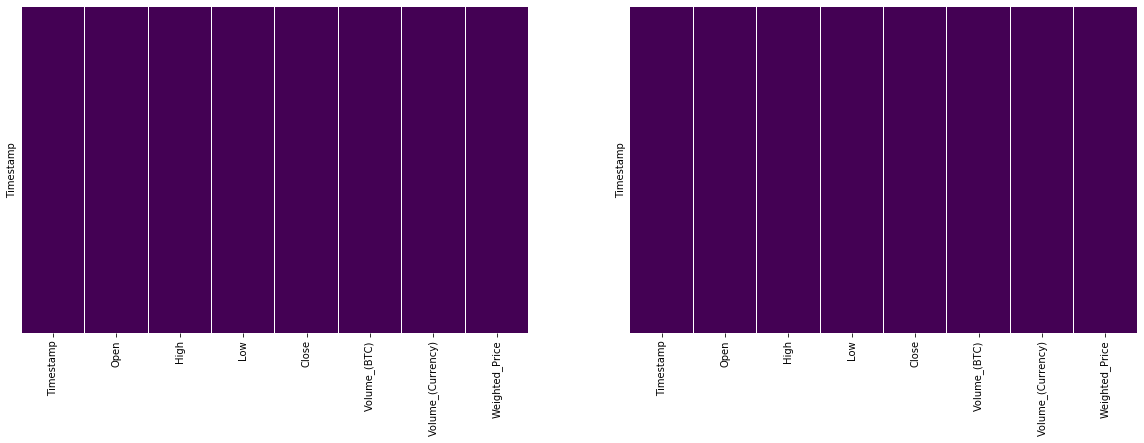

In [30]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
sns.heatmap(data_1.isnull(),cmap='viridis',yticklabels=False,cbar=False)
bar.set_title('Data 1')
bar.set_xlabel('columns',fontsize=14)
bar.set_ylabel('NaN values',fontsize=14)
plt.subplot(1,2,2)
sns.heatmap(data_2.isnull(),cmap='viridis',yticklabels=False,cbar=False)
bar.set_title('Data 2')
bar.set_xlabel('columns',fontsize=14)
bar.set_ylabel('NaN values',fontsize=14)
plt.show()

In [23]:
df1=data_1
df2=data_2
df1.index = df1.Timestamp
df2.index = df2.Timestamp
df1 = df1.resample('M').mean()
df2 = df2.resample('M').mean()

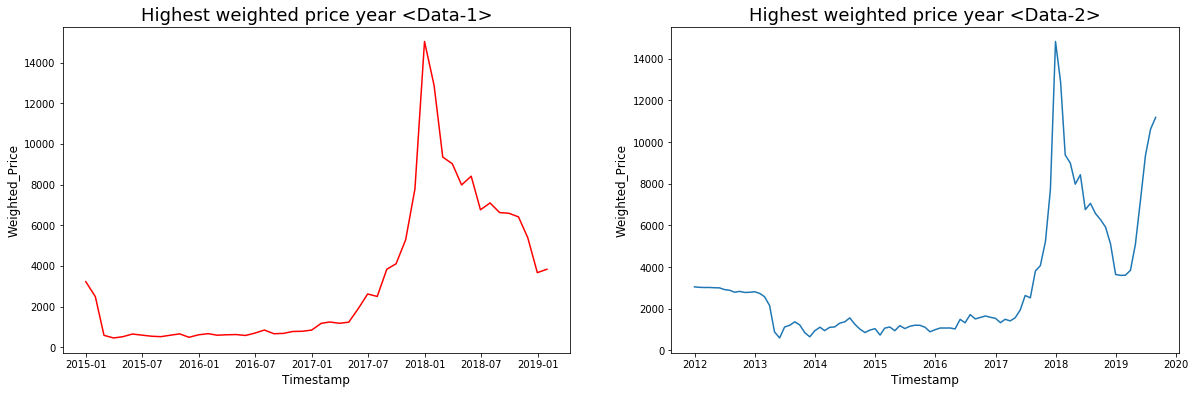

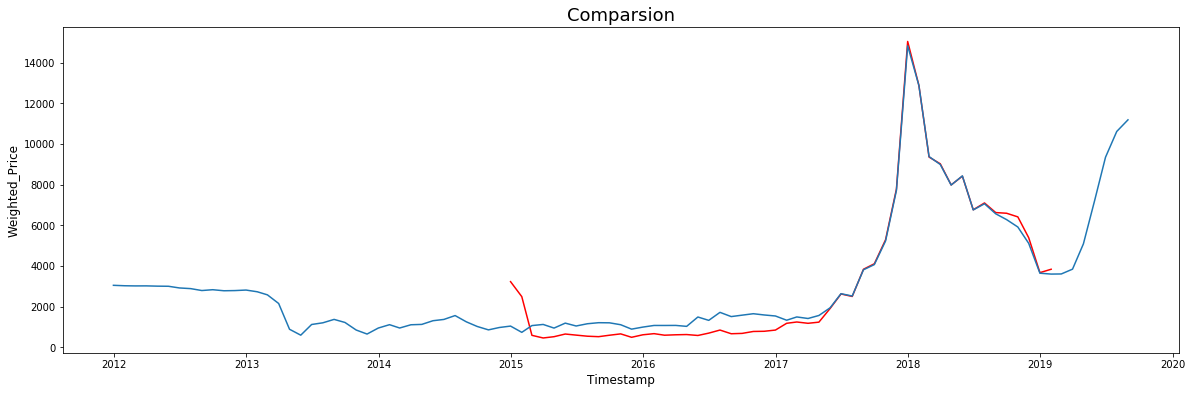

In [24]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Highest weighted price year <Data-1>',fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weighted_Price',fontsize=12)
sns.lineplot(x=df1.index,y=df1.Weighted_Price,color='red')
plt.subplot(1,2,2)
plt.title('Highest weighted price year <Data-2>',fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weighted_Price',fontsize=12)
sns.lineplot(x=df2.index,y=df2.Weighted_Price)
plt.figure(figsize=(20,6))
plt.title('Comparsion',fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weighted_Price',fontsize=12)
sns.lineplot(x=df1.index,y=df1.Weighted_Price,color='red')
sns.lineplot(x=df2.index,y=df2.Weighted_Price)
plt.show()

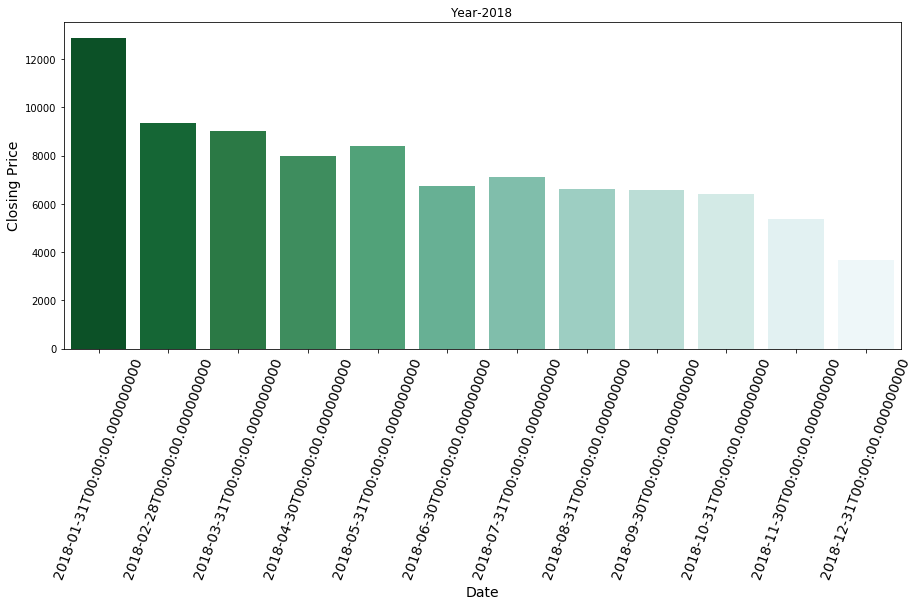

In [25]:
plt.figure(figsize=(15,6))
df_2018=df1['2018']
bar=sns.barplot(x=df_2018.index,y=df_2018.Close,palette="BuGn_r")
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)
bar.set_title('Year-2018')
bar.set_xlabel('Date',fontsize=14)
bar.set_ylabel('Closing Price',fontsize=14)
plt.show()

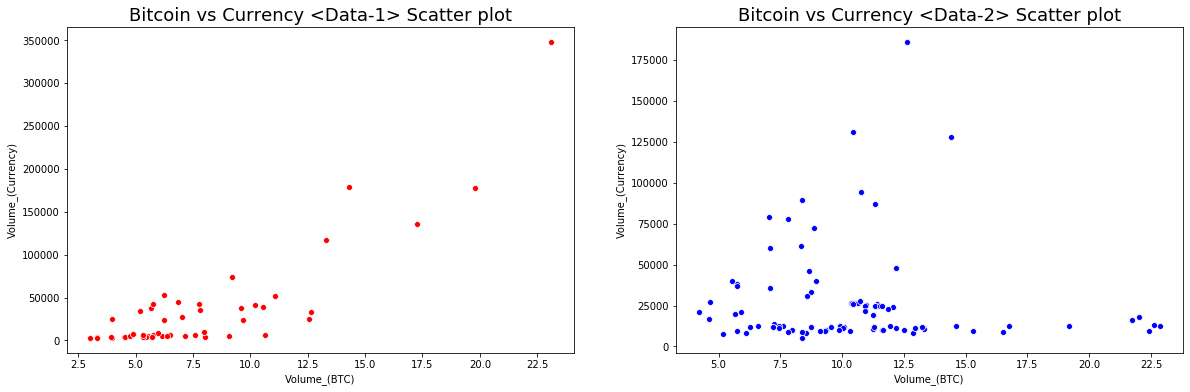

In [26]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Bitcoin vs Currency <Data-1> Scatter plot',fontsize=18)
sns.scatterplot(x='Volume_(BTC)',y='Volume_(Currency)',data=df1,color='red')
plt.subplot(1,2,2)
plt.title('Bitcoin vs Currency <Data-2> Scatter plot',fontsize=18)
sns.scatterplot(x='Volume_(BTC)',y='Volume_(Currency)',data=df2,color='blue')

[Text(0, 0, '2017-11-30T00:00:00.000000000'),
 Text(0, 0, '2017-12-31T00:00:00.000000000'),
 Text(0, 0, '2018-01-31T00:00:00.000000000'),
 Text(0, 0, '2018-02-28T00:00:00.000000000'),
 Text(0, 0, '2018-03-31T00:00:00.000000000'),
 Text(0, 0, '2018-04-30T00:00:00.000000000'),
 Text(0, 0, '2018-05-31T00:00:00.000000000'),
 Text(0, 0, '2019-06-30T00:00:00.000000000'),
 Text(0, 0, '2019-07-31T00:00:00.000000000'),
 Text(0, 0, '2019-08-31T00:00:00.000000000')]

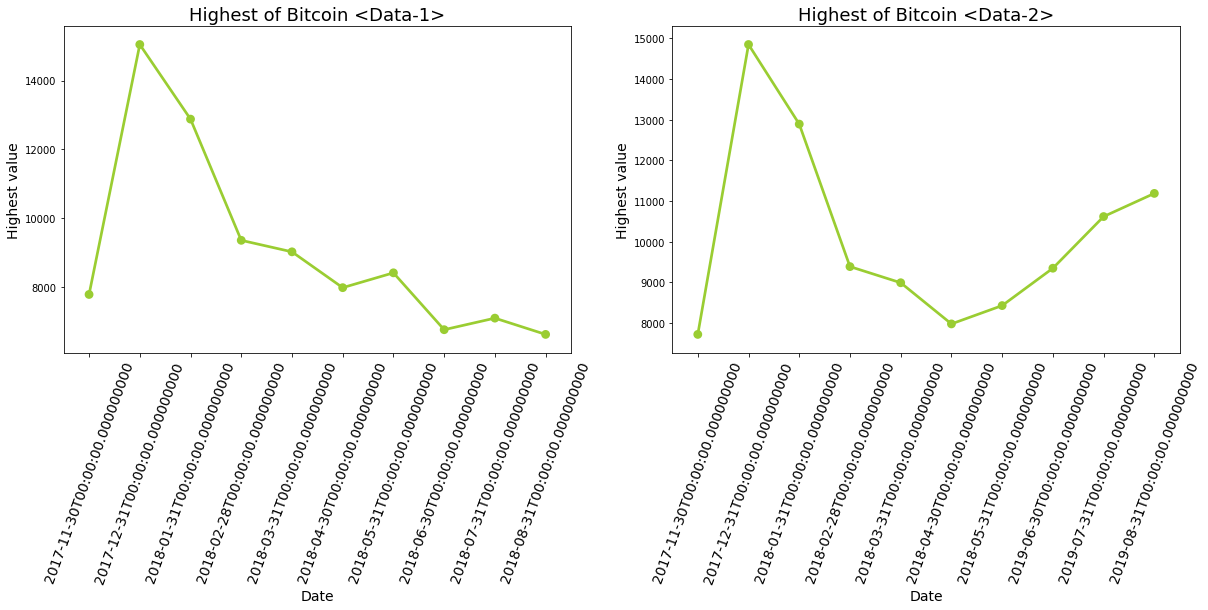

In [29]:
high_df=df1.sort_values(by=['High'],ascending=False).head(10)
high_df_2=df2.sort_values(by=['High'],ascending=False).head(10)

plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Highest of Bitcoin <Data-1>',fontsize=18)
bar=sns.pointplot(x= high_df.index,y= high_df.High,color='yellowgreen')
bar.set_xlabel("Date",fontsize=14)
bar.set_ylabel('Highest value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

plt.subplot(1,2,2)
plt.title('Highest of Bitcoin <Data-2>',fontsize=18)
bar=sns.pointplot(x= high_df_2.index,y= high_df_2.High,color='yellowgreen')
bar.set_xlabel("Date",fontsize=14)
bar.set_ylabel('Highest value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

[Text(0, 0, '2013-04-30T00:00:00.000000000'),
 Text(0, 0, '2013-05-31T00:00:00.000000000'),
 Text(0, 0, '2013-10-31T00:00:00.000000000'),
 Text(0, 0, '2013-11-30T00:00:00.000000000'),
 Text(0, 0, '2013-12-31T00:00:00.000000000'),
 Text(0, 0, '2014-02-28T00:00:00.000000000'),
 Text(0, 0, '2014-10-31T00:00:00.000000000'),
 Text(0, 0, '2015-01-31T00:00:00.000000000'),
 Text(0, 0, '2015-04-30T00:00:00.000000000'),
 Text(0, 0, '2015-11-30T00:00:00.000000000')]

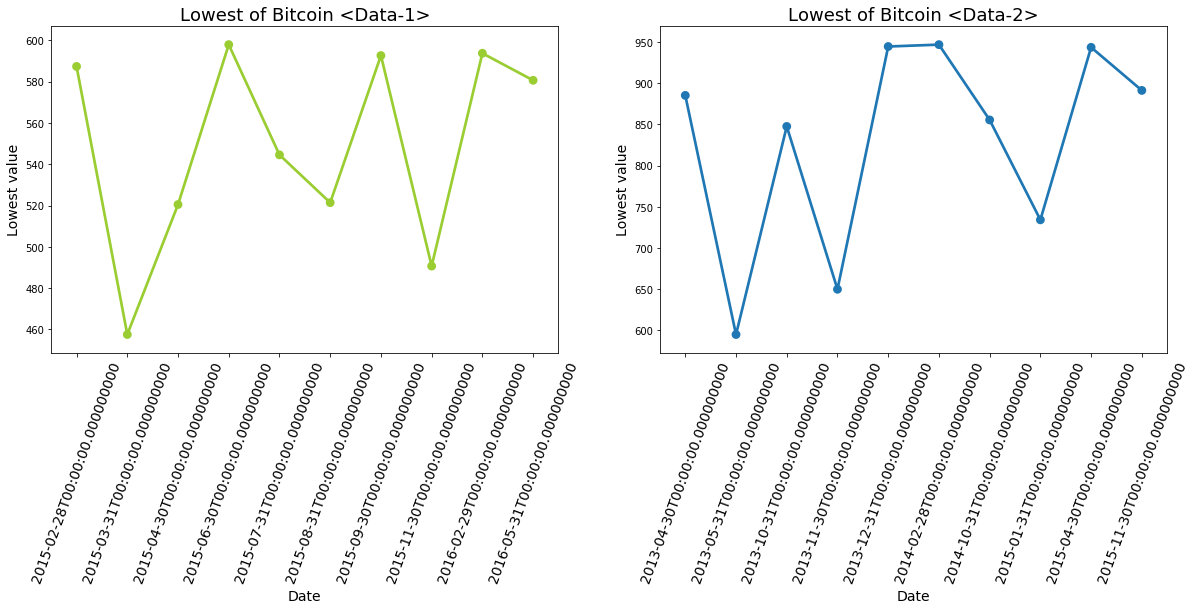

In [31]:
low_df=df1.sort_values(by=['Low'],ascending=True).head(10)
low_df_2=df2.sort_values(by=['Low'],ascending=True).head(10)

plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Lowest of Bitcoin <Data-1>',fontsize=18)
bar=sns.pointplot(x= low_df.index,y= low_df.Low,color='yellowgreen')
bar.set_xlabel("Date",fontsize=14)
bar.set_ylabel('Lowest value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

plt.subplot(1,2,2)
plt.title('Lowest of Bitcoin <Data-2>',fontsize=18)
bar=sns.pointplot(x= low_df_2.index,y= low_df_2.Low)
bar.set_xlabel("Date",fontsize=14)
bar.set_ylabel('Lowest value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

In [32]:
df=data_1
df['Timestamp']=df['Timestamp'].map(dt.datetime.toordinal)

In [33]:
x=df['Timestamp'].values
y=df['Close'].values
x=x.reshape(-1,1)

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

0.5028380517399124


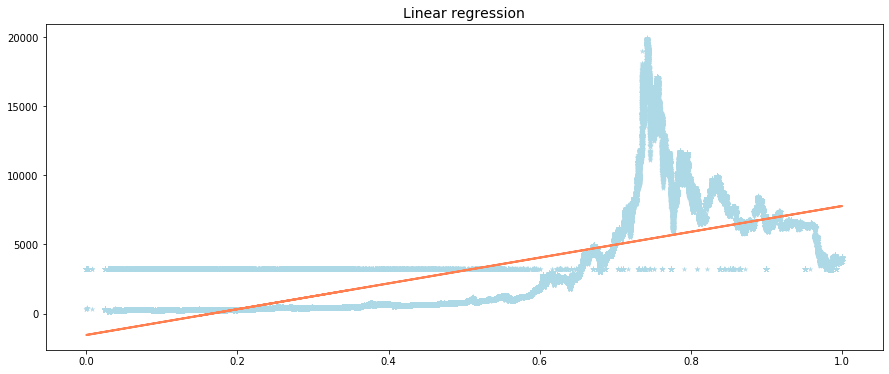

In [51]:
plt.figure(figsize=(15,6))
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)
ypred = linear_regressor.predict(xtest)
lin_ac=linear_regressor.score(xtest,ytest)
print(lin_ac)
plt.title('Linear regression',fontsize=14)
plt.scatter(xtest,ytest,marker='*',linewidth=0,color='lightblue',alpha=0.9)
plt.plot(xtest,ypred,color='coral',linewidth=2)
plt.show()

r squared value is :  0.5028380517399124


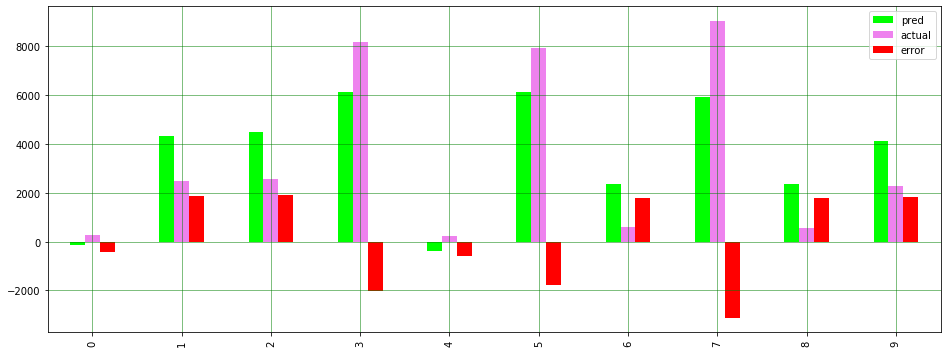

In [53]:
results=pd.DataFrame({'pred':ypred,'actual':ytest})
results['error']=results.pred - results.actual
results_10=results.head(10)
print('r squared value is : ',lin_ac)
results_10.plot(kind='bar',figsize=(16,6),color=['lime','violet','red'])
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(x)
poly_regressor.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
poly_ac=lin_reg.score(X_poly, y)
print('r squared value is : ',poly_ac)

r squared value is :  0.5248134285968187


In [58]:
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(xtrain,ytrain)
y_pred = tree_regressor.predict(xtest)
tree_ac = tree_regressor.score(xtest,ytest)
print('r squared value is : ',tree_ac)

r squared value is :  0.9762835891826671


In [60]:
Models=['Linear Regression','Polynomial Regression','Decision Tree']
Accuracy= []
score=(lin_ac,poly_ac,tree_ac)
for i in score :
    Accuracy.append(round(i*100))

In [61]:
Performance_of_Models=pd.DataFrame({'Model' :Models , 'Score': Accuracy}).sort_values(by='Score',ascending=False)

In [62]:
Performance_of_Models

,Model,Score
2,Decision Tree,98.0
1,Polynomial Regression,52.0
0,Linear Regression,50.0


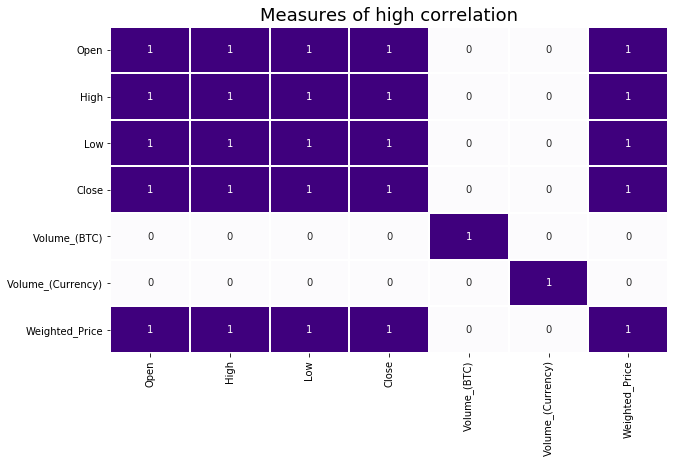

In [64]:
plt.figure(figsize=(10,6))
plt.title('Measures of high correlation',fontsize=18)
sns.heatmap(cbar=False,annot=True,data=df1.corr()>0.95,cmap='Purples',linewidth=1)

In [65]:
x=df[['Open','High','Low']].values
y=df['Close'].values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)
ypred = linear_regressor.predict(xtest)
score=linear_regressor.score(xtest,ytest)
print('Linear regression score with most correlated features' ,score)

Linear regression score with most correlated features 0.999998989720636


In [66]:
results=pd.DataFrame({'pred':ypred,'actual':ytest})
results['error']=results.pred-results.actual

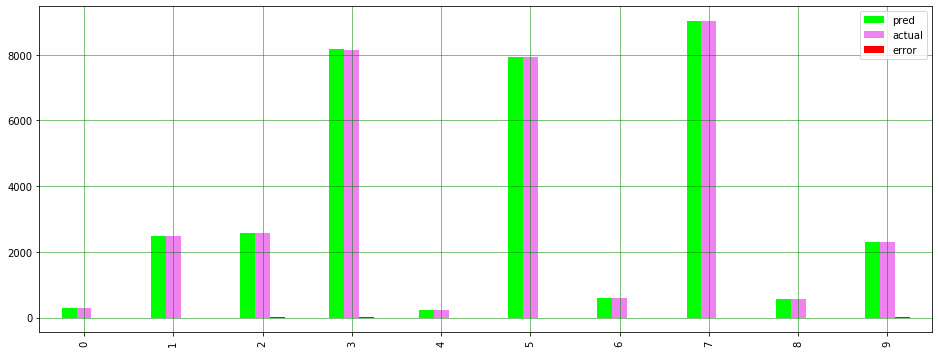

In [69]:
results_10=results.head(10)
results_10.plot(kind='bar',figsize=(16,6),color=['lime','violet','red'])
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()